In [48]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Table of contents
1. [Introduction](#Introduction)
    - [What is data?](#What-is-data?)
    - [Types of data](#Types-of-data)
        - [Format classification](#Format-classification)
        - [Structural classification](#Structural-classification)
2. [Probability and Statistics](#Probability-and-Statistics)
3. [Data Science](#Data-Science)
    - [Regression](#Regression)
        - [Linear Regression](#Linear-Regression)

# Introduction
In today's world where technology and especially ability to store and process information is rapidly evolving, this large amount of information can be leveraged to test natural sciences or empower businesses to better understand their ecosystems.

## What is data?
Data is any collection of numerical values from which some meaningful information can be derived. Even textual or image values can be thought of in terms of numbers. It is important to note that a collection of numerical values that does not contain any information is essentially *garbage*.

## Types of data
Data can be classified in a variety of ways. For the time being, I will discuss two types of classifications, classification on the basis of format
and classification on the basis of structure.

### Format classification
On the basis of the format in which data is available, we have,

1.) Numerical data - This is the kind of data which is in pure numerical form and typically gives us information about some attribute of a population. For example, weights of students in a classroom.

In [10]:
pd.DataFrame(data={"Student ID":[5001, 5002, 5003], "Weight (Kg)":[55, 62, 58]}, columns=["Student ID", "Weight (Kg)"])

,Student ID,Weight (Kg)
0,5001,55
1,5002,62
2,5003,58


2.) Textual data - This is the kind of data that is in text format. In theory, it too, can be converted to numerical form by embedding as an abstract vector. Textual data is mostly used to categorize a population (for example, blood group), but can also take arbitrary values (for example, hobby).

In [12]:
pd.DataFrame(data={"Student ID":[5001, 5002, 5003], "Blood Group":["O+", "O+", "O-"], "Hobby":["Swimming", "Playing Chess", "Singing"]}, 
             columns=["Student ID", "Blood Group", "Hobby"])

,Student ID,Blood Group,Hobby
0,5001,O+,Swimming
1,5002,O+,Playing Chess
2,5003,O-,Singing


3.) Image data - This kind of data is a 2 dimensional representation of information, where each pixel in an image has some numerical value that defines the color of that pixel. The thing that truly separates image data from purely numerical data is the fact that in an image, the relative position of 1 pixel from another pixel in 2 dimensional space is important. If I were to simply convert a $25\text{ px}\times25\text{ px}$ image into a single column containing $625$ values, the information about the relative position of the pixels is lost.

In [16]:
#WIP for image data

4.) Time Series Data - This kind of data takes values at multiple instances of time. It is used to represent electrical signals, audio signals, price of stocks or any physical quantity that changes with time.

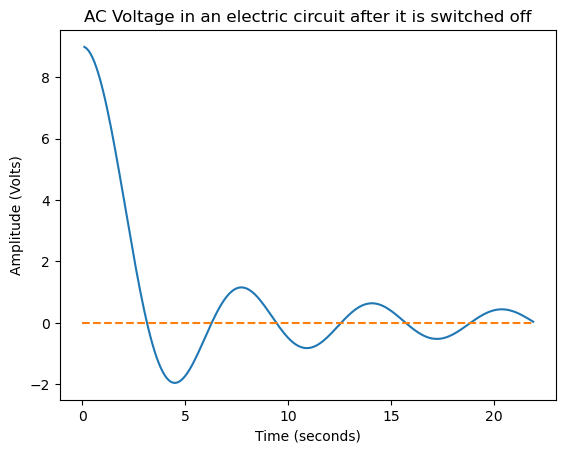

In [79]:
plt.plot(np.arange(0, 7*np.pi, 0.1), (9.0*np.sin(np.arange(0, 7*np.pi, 0.1)))/(np.arange(0, 7*np.pi, 0.1)))
plt.plot(np.arange(0, 7*np.pi, 0.1), 0*np.arange(0, 7*np.pi, 0.1), linestyle="--", linewidth=1.5)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (Volts)")
plt.title("AC Voltage in an electric circuit after it is switched off")
plt.show()

### Structural classification
Data can also be classified on the basis of its structure. Broadly speaking, there are two types of data in this category, data structured as a table and unstructured data in the form of a hash map (key-value pairs).

1.) Table form - This is data that can be arranged in a tabular form with a specified number of rows and columns. This form is used when it is required to store data pertaining a particular set of properties of a population. For example,

In [83]:
pd.DataFrame(data = {"Student ID":[5001, 5002, 5003, 5004, 5005],
                     "Classroom":["9-A", "10-B", "10-A", "10-B", "12-C"],
                     "Class Roll No.":[30, 21, 1, 16, 9],
                     "Weight (Kg)":[50, 52, 63, 55, 70],
                     "Height (cm)":[150, 153, 162, 160, 172]}, 
             columns=["Student ID", "Classroom", "Class Roll No.", "Weight (Kg)", "Height (cm)"])

,Student ID,Classroom,Class Roll No.,Weight (Kg),Height (cm)
0,5001,9-A,30,50,150
1,5002,10-B,21,52,153
2,5003,10-A,1,63,162
3,5004,10-B,16,55,160
4,5005,12-C,9,70,172


2.) Unstructured form - Now, suppose in the previous example, if we were to add 5 students of an entirely different school. What would the data look like?

In [96]:
pd.DataFrame(data = {"Student ID":[5001, 5002, 5003, 5004, 5005]+[np.nan]*5,
                     "Classroom":["9-A", "10-B", "10-A", "10-B", "12-C"]+[np.nan]*5,
                     "Class Roll No.":[30, 21, 1, 16, 9]+[np.nan]*5,
                     "Weight (Kg)":[50, 52, 63, 55, 70, 49, 65, 54, 55, 60],
                     "Height (cm)":[150, 153, 162, 160, 172, 150, 157, 157, 160, 162]},
             columns=["Student ID", "Classroom", "Class Roll No.", "Weight (Kg)", "Height (cm)"])

,Student ID,Classroom,Class Roll No.,Weight (Kg),Height (cm)
0,5001.0,9-A,30.0,50,150
1,5002.0,10-B,21.0,52,153
2,5003.0,10-A,1.0,63,162
3,5004.0,10-B,16.0,55,160
4,5005.0,12-C,9.0,70,172
5,NaN,NaN,NaN,49,150
6,NaN,NaN,NaN,65,157
7,NaN,NaN,NaN,54,157
8,NaN,NaN,NaN,55,160
9,NaN,NaN,NaN,60,162


Now, a lot of space is being wasted just to accomodate data in the same table where it perhaps does not belong. When such mixture of data is present, it is suitable to store it in the form of key-value pairs or JSON format.

In [100]:
{
  "student 1": {
    "Student ID": 5001,
    "Classroom": "9-A",
    "Class Roll No.": 30,
    "Weight (Kg)": 50,
    "Height (cm)": 150
  },
  "student 2": {
    "Student ID": 5002,
    "Classroom": "10-B",
    "Class Roll No.": 21,
    "Weight (Kg)": 52,
    "Height (cm)": 153
  },
  "student 3": {
    "Student ID": 5003,
    "Classroom": "10-A",
    "Class Roll No.": 1,
    "Weight (Kg)": 63,
    "Height (cm)": 162
  },
  "student 4": {
    "Student ID": 5004,
    "Classroom": "10-B",
    "Class Roll No.": 16,
    "Weight (Kg)": 55,
    "Height (cm)": 160
  },
  "student 5": {
    "Student ID": 5005,
    "Classroom": "12-C",
    "Class Roll No.": 9,
    "Weight (Kg)": 70,
    "Height (cm)": 172
  },
  "student 6": {
    "Weight (Kg)": 49,
    "Height (cm)": 150
  },
  "student 7": {
    "Weight (Kg)": 65,
    "Height (cm)": 157
  },
  "student 8": {
    "Weight (Kg)": 54,
    "Height (cm)": 157
  },
  "student 9": {
    "Weight (Kg)": 55,
    "Height (cm)": 160
  },
  "student 10": {
    "Weight (Kg)": 60,
    "Height (cm)": 162
  }
}

{'student 1': {'Student ID': 5001,
  'Classroom': '9-A',
  'Class Roll No.': 30,
  'Weight (Kg)': 50,
  'Height (cm)': 150},
 'student 2': {'Student ID': 5002,
  'Classroom': '10-B',
  'Class Roll No.': 21,
  'Weight (Kg)': 52,
  'Height (cm)': 153},
 'student 3': {'Student ID': 5003,
  'Classroom': '10-A',
  'Class Roll No.': 1,
  'Weight (Kg)': 63,
  'Height (cm)': 162},
 'student 4': {'Student ID': 5004,
  'Classroom': '10-B',
  'Class Roll No.': 16,
  'Weight (Kg)': 55,
  'Height (cm)': 160},
 'student 5': {'Student ID': 5005,
  'Classroom': '12-C',
  'Class Roll No.': 9,
  'Weight (Kg)': 70,
  'Height (cm)': 172},
 'student 6': {'Weight (Kg)': 49, 'Height (cm)': 150},
 'student 7': {'Weight (Kg)': 65, 'Height (cm)': 157},
 'student 8': {'Weight (Kg)': 54, 'Height (cm)': 157},
 'student 9': {'Weight (Kg)': 55, 'Height (cm)': 160},
 'student 10': {'Weight (Kg)': 60, 'Height (cm)': 162}}

# Probability and Statistics

In [1]:
#WIP

# Data Science
Data Science deals with extracting, polishing and using data to scientifically model and predict various real-world phenomena. It is a vast, interdisciplinary skill lying at the cross-section of statistics, mathematical modelling and machine-learning algorithms. It aims to address broadly three types of problem statements: predicting a value(regression), prediction a category(classification) and identifying a group(clustering).

## Regression
Regression deals with predicting an actual numerical value for some attribute. Suppose you have some sample data, $(x,y)$ where $y$ is the attribute we are interested in and the hypothesis is that $y$ depends on $x$ in some way. Typically, $y$ is a column vector and $x$ can be a column vector or a matrix with the same number of rows as $y$. Now, given some $x_0 \notin x$, we want to predict the corresponding $y_0$. That is, given some unseen data, we want to make a prediction for the attribute. If the hypothesis is true, it should be possible in theory. One approach (although rarely usable in real-life scenarios) is to model $y$ as a function of $x$ with some adjustable parameters $a$. That is,
$$y\approx f(x,a)$$
Suppose that $y$ were **exactly** related to $x$ by some function, even then, we would never observe $y=f(x,a)$ because $y$ also includes statistical noise from data observation.
We have $x$ and $y$ from observation, we can assume $f$ and $a$. By plugging in everything, we can estimate the error as a function of the parameter $a$.
$$L(a)=||y-f(x,a)||^2$$
Now, the idea is to fit the parameter $a$ to minimize this error.
$$\nabla L(a) = 0$$
Note that $y$ and $f(x,a)$ are vectors, so the total error in all data points is actually given by the norm. Why norm? It ensures that errors in individual data points are squared before adding because *errors always add up, they never cancel out*. We further take square of the norm for easier differentiation. It is just a convention. <br>
If we can solve this equation for $a$, then we're done. If not, then we can instead use gradient descent. The idea is to start with some initial value for $a$, say $a_0$. If $\nabla L(a_0) = 0$ we're done and $a_0$ is the desired value for the parameter. If not, $\nabla L(a_0)\neq0$. Now the idea is that the gradient always points in the direction (in parameter space) where the function is maximized. So, for the next iteration, we can update $a$ to move in the opposite direction to bring $L$ closer to the minima.
$$a_1 = a_0 - \eta\nabla L(a_0)$$
Here, $\eta>0$ is a *hyperparameter* of the model called the **learning rate** which can be used to adjust the convergence of the model. For a finite number of iterations, if $\eta$ is too small, the convergence will be too slow, and may stop early. If $\eta$ is too large, the solution will diverge because it will keep overshooting and oscillating around the minima. The sweet spot is somewhere in between which allows $L$ to get closer to the minima in the same number of iterations without overshooting. A hyperparameter is a parameter of the model which is like an adjustable knob. While we optimise the parameters to fit the best model, tuning hyperparameters help us refine our parameters.

A note about $\eta$. For a function with multiple minima, the story is a bit different. It is advised to first try a large value of $\eta$ so that $L$ can explore the parameter landscape. Once a value of $\eta$ is found that gives a big boost to the accuracy, it means $L$ is in the vicinity in one of the better minima. Then, one can slightly lower $\eta$ to reach closer to that minima. Often, it is a wasteful effort to dwell too much on finding the global minima. With a large $N$ number of paramters (which is the length of the vector $a$), even the parameter space becomes $N$ dimensional, and a larger dimensional space can obviously have more $N$-dimensional volume to explore.

Anyways, this was the ideal scenario. What if the data can't really help us model $y$ as a nice function of $x$? In such cases, an approach known as **boosting** is used to first train a rough model. Afterwards, the model is improved by training another model that reduces the error of the first model. This is done in succession to reach the desired accuracy. This kind of optimization is known as *functional optimization*. (More on that letter, let's first check function optimization models.)

### Linear Regression

# Deep Learning

## 1.) Concepts of Neural Networks

Let 
$\begin{align}
    \mathbf{x} &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
         \end{bmatrix}
  \end{align}$
be the input vector and
$\begin{align}
    \mathbf{y} &= \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{n}
         \end{bmatrix}
  \end{align}$
be the output (target) vector. <br>
Let $L$ be the number of layers excluding input layer (hidden layers + output layer) and $L(\mathbf{g}(\mathbf{x}), \mathbf{y})$ be the loss function. <br>
Let $\textbf{b}^l$ be the bias of $l^{\text{th}}$ layer. It is indexed by $b^l_j$ which is the bias term for $j^{\text{th}}$ node of $l^{\text{th}}$ layer. <br>
Let $W^{l}$ be the weight matrix between $l$ and $l-1$ layer. It is indexed by $w_{jk}^l$ where $j$ is a node in the $l^{\text{th}}$ layer and $k$ is a node in the $(l-1)^{\text{th}}$ layer. <br>
Let $$z_j^{l}=\sum_k \left(w_{jk}^l A^{l-1}_k\right) + b^l_j$$ be the pre-activation of $j^\text{th}$ node of $l^{\text{th}}$ layer.

Let $\phi(x)$ be the activation function, then, the activation of $j^\text{th}$ node of $l^{\text{th}}$ layer is given by:
$$A^l_j = \phi(z^l_j) = \phi\left(\sum_k \left(w_{jk}^l A^{l-1}_k\right) + b^l_j\right)$$

Matrix form of the equations:-
$$\mathbf{Z}^l = W^l\mathbf{A}^{l-1}+\mathbf{b}^l$$
$$\mathbf{A}^l = \phi(\mathbf{Z}^l) = \phi(W^l\mathbf{A}^{l-1}+\mathbf{b}^l)$$

If $\mathbf{g}(\mathbf{x}, \mathbf{W}, \mathbf{b})$ is the network output, where,
$\begin{align}
    \mathbf{W} &= \begin{bmatrix}
           W^1 \\
           W^2 \\
           \vdots \\
           W^L
         \end{bmatrix}
  \end{align}$
and 
$\begin{align}
    \mathbf{b} &= \begin{bmatrix}
           \mathbf{b}^1 \\
           \mathbf{b}^2 \\
           \vdots \\
           \mathbf{b}^L
         \end{bmatrix}
  \end{align}$
then, $\mathbf{g}(\mathbf{x}, \mathbf{W}, \mathbf{b})=\mathbf{A}^{L}$, which is the activation of the last layer.
Finally, the loss function is given by $L(\mathbf{g}(\mathbf{x}, \mathbf{W}, \mathbf{b}), \mathbf{y})$.

Note:- If $L$ is the number of hidden layers, then $l \in \{1, 2, 3, \cdots, L\}$. Furthermore, $l = 0$ can be considered the input layer.

## 2.) Backpropagation Calculus

To minimise the loss function, we consider the critical points at which the gradiet of the loss function with respect to the weights and biases vanish. To furthermore prove these points are points of minima (and not maxima) and thus analytically find the optimal values are not possible. Hence we will use the approach of gradient descent. <br>
In this method, we will first evaluate the gradient of the loss function with respect to the weights and biases. The negative of this gradient will give the direction of a minimum. We will update the gradients and biases to move in that direction until convergence. From here on, tensorial notation is used.

$$\nabla_{w^l_{jk}, b^l_k} L = \left(\frac{\partial L}{\partial w^l_{jk}},\quad \frac{\partial L}{\partial b^l_k}\right)$$

Let us first consider the first term inside the parenthesis. Note that although $L=L(A^L_i)$, $A^L_i$ is itself a function of $A^{L-1}_i$ and so on. So, $A^L_i$ is also a function of $A^l_i$ for some general $l$ and hence we can expand $\frac{\partial L}{\partial w^l_{jk}}$ using chain rule through $A^l_i$. This gives:

$$\frac{\partial L}{\partial w^l_{jk}} = \sum_p\frac{\partial L}{\partial A^l_p}\frac{\partial A^l_p}{\partial w^l_{jk}}$$
$$\frac{\partial L}{\partial w^l_{jk}} = \sum_p\frac{\partial L}{\partial A^l_p}\sum_q\frac{\partial A^l_p}{\partial z^l_q}\frac{\partial z^l_q}{\partial w^l_{jk}}$$
$$\frac{\partial L}{\partial w^l_{jk}} = \sum_{p,q}\frac{\partial L}{\partial A^l_p}\frac{\partial \phi(z^l_p)}{\partial z^l_q}\frac{\partial z^l_q}{\partial w^l_{jk}}$$
$$\frac{\partial L}{\partial w^l_{jk}} = \sum_{p,q}\frac{\partial L}{\partial A^l_p}\frac{\partial \phi(z^l_p)}{\partial z^l_p}\frac{\partial z^l_p}{\partial z^l_q}\frac{\partial z^l_q}{\partial w^l_{jk}}$$
$$\frac{\partial L}{\partial w^l_{jk}} = \sum_{p,q}\frac{\partial L}{\partial A^l_p}\phi'(z^l_p)\delta_{p,q}\frac{\partial z^l_q}{\partial w^l_{jk}}$$
$$\frac{\partial L}{\partial w^l_{jk}} = \sum_{p}\frac{\partial L}{\partial A^l_p}\phi'(z^l_p)\frac{\partial z^l_p}{\partial w^l_{jk}}$$
$$\frac{\partial L}{\partial w^l_{jk}} = \sum_{p}\frac{\partial L}{\partial A^l_p}\phi'(z^l_p)\frac{\partial}{\partial w^l_{jk}}\left(\sum_s\left(w^l_{ps}A^{l-1}_s\right)+b^l_p\right)$$
$$\frac{\partial L}{\partial w^l_{jk}} = \sum_{p}\frac{\partial L}{\partial A^l_p}\phi'(z^l_p)\sum_s\frac{\partial}{\partial w^l_{jk}}(w^l_{ps}A^{l-1}_s)$$
$$\frac{\partial L}{\partial w^l_{jk}} = \sum_{p}\frac{\partial L}{\partial A^l_p}\phi'(z^l_p)\sum_s\left(\frac{\partial w^l_{ps}}{\partial w^l_{jk}}A^{l-1}_s+w^l_{ps}\frac{\partial A^{l-1}_s}{\partial w^l_{jk}}\right)$$
$$\frac{\partial L}{\partial w^l_{jk}} = \sum_{p}\frac{\partial L}{\partial A^l_p}\phi'(z^l_p)\sum_s\delta_{p,j}\delta_{s,k} A^{l-1}_s$$
$$\frac{\partial L}{\partial w^l_{jk}} = \sum_{p}\frac{\partial L}{\partial A^l_p}\phi'(z^l_p)\delta_{p,j}\sum_s\delta_{s,k} A^{l-1}_s$$
$$\frac{\partial L}{\partial w^l_{jk}} = \sum_{p}\frac{\partial L}{\partial A^l_p}\phi'(z^l_p)\delta_{p,j}A^{l-1}_k$$
$$\frac{\partial L}{\partial w^l_{jk}} = \frac{\partial L}{\partial A^l_j}\phi'(z^l_j)A^{l-1}_k$$

Let $$\delta^l_j=\frac{\partial L}{\partial A^l_j}\phi'(z^l_j)$$
Then, we have,
$$\frac{\partial L}{\partial w^l_{jk}} = \delta^l_j A^{l-1}_k$$
This is the general equation for gradient of loss function with respect to weights. In matrix form, we have,
$$\frac{\partial L}{\partial W^l} = \delta^l \otimes \mathbf{A}^{l-1}$$
Where
$$\delta^l = \frac{\partial L}{\partial \mathbf{A}^l}\odot\phi'(\mathbf{Z}^l)$$
is the matrix form of definition of $\delta^l_j$

Now, let's look at the value of $\delta$ for $l=L$.
$$\delta^L =\frac{\partial L}{\partial \mathbf{A}^L}\odot\phi'(\mathbf{Z}^L)$$
But, $\frac{\partial L}{\partial \mathbf{A}^L} = \frac{\partial L}{\partial \mathbf{g}}$ where $\mathbf{g}$ is the network output and thus
$$\delta^L =\frac{\partial L}{\partial \mathbf{g}}\odot\phi'(\mathbf{Z}^L)$$
What about $l<L$? Let's take a look.
$$\delta^l_j= \frac{\partial L}{\partial A^l_j}\phi'(z^l_j)$$
Notice that the only unknown piece is $\frac{\partial L}{\partial A^l_j}$. Let's try to evaluate it. Ideally, since $\frac{\partial L}{\partial A^L_j}$ is known, it would be best to expand this piece as a chain rule of $(l+1)^{\text{th}}$ layer to iteratively compute it.
$$\frac{\partial L}{\partial A^l_j} = \sum_s\frac{\partial L}{\partial A^{l+1}_s}\frac{\partial A^{l+1}_s}{\partial A^l_j}$$
$$\frac{\partial L}{\partial A^l_j} = \sum_s\frac{\partial L}{\partial A^{l+1}_s}\sum_r\frac{\partial A^{l+1}_s}{\partial z^{l+1}_r}\frac{\partial z^{l+1}_r}{\partial A^l_j}$$
$$\frac{\partial L}{\partial A^l_j} = \sum_s\frac{\partial L}{\partial A^{l+1}_s}\sum_r\phi'(z^{l+1}_s)\frac{\partial z^{l+1}_s}{\partial z^{l+1}_r}\frac{\partial z^{l+1}_r}{\partial A^l_j}$$
$$\frac{\partial L}{\partial A^l_j} = \sum_s\frac{\partial L}{\partial A^{l+1}_s}\sum_r\phi'(z^{l+1}_s)\delta_{r,s}\frac{\partial z^{l+1}_r}{\partial A^l_j}$$
$$\frac{\partial L}{\partial A^l_j} = \sum_s\frac{\partial L}{\partial A^{l+1}_s}\phi'(z^{l+1}_s)\frac{\partial z^{l+1}_s}{\partial A^l_j}$$
$$\frac{\partial L}{\partial A^l_j} = \sum_s\frac{\partial L}{\partial A^{l+1}_s}\phi'(z^{l+1}_s)\frac{\partial}{\partial A^l_j}\left(\sum_p\left(w^{l+1}_{sp}A^l_p\right)+b^{l+1}_s\right)$$
$$\frac{\partial L}{\partial A^l_j} = \sum_s\frac{\partial L}{\partial A^{l+1}_s}\phi'(z^{l+1}_s)\sum_p\frac{\partial}{\partial A^l_j}(w^{l+1}_{sp}A^l_p)$$
$$\frac{\partial L}{\partial A^l_j} = \sum_s\frac{\partial L}{\partial A^{l+1}_s}\phi'(z^{l+1}_s)\sum_p w^{l+1}_{sp}\frac{\partial A^l_p}{\partial A^l_j}$$
$$\frac{\partial L}{\partial A^l_j} = \sum_s\frac{\partial L}{\partial A^{l+1}_s}\phi'(z^{l+1}_s)\sum_p w^{l+1}_{sp}\delta_{p,j}$$
$$\frac{\partial L}{\partial A^l_j} = \sum_s\frac{\partial L}{\partial A^{l+1}_s}\phi'(z^{l+1}_s)w^{l+1}_{sj}$$
Notice that the first two factors inside the summation are precisely $\delta^{l+1}_s$!
$$\frac{\partial L}{\partial A^l_j} = \sum_s\delta^{l+1}_sw^{l+1}_{sj}$$
Thus,
$$\delta^l_j= \sum_s\left(\delta^{l+1}_sw^{l+1}_{sj}\right)\phi'(z^l_j)$$
In matrix form,
$$\delta^l= \left(W^{l+1}_T\delta^{l+1}\right)\odot\phi'(\mathbf{Z}^l)$$
Finally, we have,
$$\frac{\partial L}{\partial W^l} = \delta^l \otimes \mathbf{A}^{l-1}, \quad \delta^l =
\left\{
\begin{array}{ll}
      \frac{\partial L}{\partial \mathbf{g}}\odot\phi'(\mathbf{Z}^L) & l=L \\
      (W^{l+1}_T\delta^{l+1})\odot\phi'(\mathbf{Z}^l) & l<L
\end{array}
\right.$$
In tensor form,
$$\frac{\partial L}{\partial w^l_{jk}} = \delta^l_j\mathbf{A}^{l-1}_k, \quad \delta^l_j =
\left\{
\begin{array}{ll}
      \frac{\partial L}{\partial g_j}\phi'(z^L_j) & l=L \\
      \sum_s\left(w^{l+1}_{sj}\delta^{l+1}_s\right)\phi'(z^l_j) & l<L
\end{array}
\right.$$

Well, what about the bias term? A simple inspection at the derivation for gradient with respect to the weights reveals the following result for the bias term:

In matrix form,
$$\frac{\partial L}{\partial \mathbf{b}^l} = \delta^l, \quad \delta^l =
\left\{
\begin{array}{ll}
      \frac{\partial L}{\partial \mathbf{g}}\odot\phi'(\mathbf{Z}^L) & l=L \\
      (W^{l+1}_T\delta^{l+1})\odot\phi'(\mathbf{Z}^l) & l<L
\end{array}
\right.$$
In tensor form,
$$\frac{\partial L}{\partial b^l_j} = \delta^l_j, \quad \delta^l_j =
\left\{
\begin{array}{ll}
      \frac{\partial L}{\partial g_j}\phi'(z^L_j) & l=L \\
      \sum_s\left(w^{l+1}_{sj}\delta^{l+1}_s\right)\phi'(z^l_j) & l<L
\end{array}
\right.$$

## 3.) Convolution Layer

Let us consider the case of a convolution layer now. Now, instead of an input vector, we have an input tensor of size $H\times W\times C$.
Where $H$ is the number of rows, $W$ is the number of columns and $C$ is the number of channels. Typically, $C$ = 3 for red, green and blue, otherwise $C$ = 1 for grayscale images. We have the input tensor
$$X = X_{ijk}$$
Here $i\in\{1,2,\cdots,H\}$, <br>$j\in\{1,2,\cdots,W\}$, <br>$k\in\{1,2,\cdots,C\}$ are the tensor indexes for the height, width and channels respectively.

In the convolution layer, the input tensor is convolved with kernels (called filters) which are used to pick up spatial features. Typically, a kernel is a square matrix of weights of size $V\times V$. First, I define the kernel tensor,
$$K=K_{ijkf}$$
Where, $i\in\{1,2,\cdots,V\}$, <br>$j\in\{1,2,\cdots,V\}$, <br> $k\in\{1,2,\cdots,C\}$, <br>$f\in\{1,2,\cdots,F\}$. <br><br>

The first two indexes specify the weight in the $i^{\text{th}}$ and $j^{\text{th}}$ position for $k^\text{th}$ color of the $f^\text{th}$ kernel. <br>
We define the convolution operator which gives the features due to convolution with the $f^{\text{th}}$ filter. The color channels are summed and combined. It may be noted that the step size of $m$ and $n$ may not be, in general, $1$. Their step size is in fact called the stride $S$ of the kernels.
$$X^\sim_{ijf} = X*K = \sum_{k=1}^C\sum_n^V\sum_m^V X_{i+m,j+n,k}K_{mnkf}$$

The size of $X^\sim_{ijf}$ is given by
$$H_\text{conv} = \frac{H-V+2P}{S} + 1$$
$$W_\text{conv} = \frac{W-V+2P}{S} + 1$$

Thus the activation becomes:
$$A_{ijf} = \phi(X^\sim_{ijf}+b_f)$$

Note that instead of a bias tensor $B_{ijf}$, we have a bias vector $b_f$, because we consider $B_{ijf} = b_f$ for all pairs of $i$ and $j$.

After the convolution layer, the signal is pooled to reduce dimensionality.
$$A^\sim_{xyz}=\text{pool}(A_{ijf})$$
Mathematically, the pooling operation would be realized as a $6^\text{th}$ rank tensor.
$$A^\sim_{xyz}=\sum_{ijf}Q_{xyzijf}A_{ijf}$$
After that, the output of the pooled layer is flattened and fed as input to a dense network.
$$A'_p = \text{flatten}(A^\sim_{xyz})$$
By similar logic, the flattening tensor consists of a $4^\text{th}$ rank tensor.
$$A'_p=\sum_{xyz}R_{pxyz}A^\sim_{xyz}$$

Now,
$$\frac{\partial L}{\partial K_{bgtv}} = \sum_p\frac{\partial L}{\partial A'_p}\frac{\partial A'_p}{\partial K_{bgtv}}$$

But, $A'p$ is now basically the input of a dense network, so we actually know the first factor. It is actually $\delta^0_p=\sum_s\left(w^1_{sp}\delta^1_s\right)\phi'(z^1_p)$ 

$$\frac{\partial L}{\partial K_{bgtv}} = \sum_p \delta^0_p\frac{\partial A'_p}{\partial K_{bgtv}}$$
$$\frac{\partial L}{\partial K_{bgtv}} = \sum_p \delta^0_p\frac{\partial }{\partial K_{bgtv}}\left(\sum_{xyz}R_{pxyz}A^\sim_{xyz}\right)$$
$$\frac{\partial L}{\partial K_{bgtv}} = \sum_{pxyz} \delta^0_p R_{pxyz}\frac{\partial A^\sim_{xyz}}{\partial K_{bgtv}}$$
$$\frac{\partial L}{\partial K_{bgtv}} = \sum_{pxyz} \delta^0_p R_{pxyz}\frac{\partial }{\partial K_{bgtv}}\left(\sum_{ijf}Q_{xyzijf}A_{ijf}\right)$$
$$\frac{\partial L}{\partial K_{bgtv}} = \sum_{pxyzijf} \delta^0_p R_{pxyz}Q_{xyzijf}\frac{\partial A_{ijf}}{\partial K_{bgtv}}$$
$$\frac{\partial L}{\partial K_{bgtv}} = \sum_{pxyzijf} \delta^0_p R_{pxyz}Q_{xyzijf}\phi'(X^\sim_{ijf}+b_f)\frac{\partial X^\sim_{ijf}}{\partial K_{bgtv}}$$
$$\frac{\partial L}{\partial K_{bgtv}} = \sum_{pxyzijf} \delta^0_p R_{pxyz}Q_{xyzijf}\phi'(X^\sim_{ijf}+b_f)\sum_{knm}X_{i+m, j+n,k}\frac{\partial K_{ijkf}}{\partial K_{bgtv}}$$
$$\frac{\partial L}{\partial K_{bgtv}} = \sum_{pxyzijf} \delta^0_p R_{pxyz}Q_{xyzijf}\phi'(X^\sim_{ijf}+b_f)\sum_{knm}X_{i+m, j+n,k}\delta_{i,b}\delta_{j,g}\delta_{k,t}\delta_{f,v}$$
$$\frac{\partial L}{\partial K_{bgtv}} = \sum_{pxyz} \delta^0_p R_{pxyz}Q_{xyzbgv}\phi'(X^\sim_{bgv}+b_v)\sum_{nm}X_{b+m, g+n,t}$$
$$\frac{\partial L}{\partial K_{bgtv}} = \left(\sum_p\delta^0_pR_{pxyz}\right)\left(\sum_{xyz}Q_{xyzbgv}\right)\phi'(X^\sim_{bgv}+b_v)\sum_{nm}X_{b+m,g+n,t}$$
The first factor represents de-flattening, the second factor represents de-pooling. These can be pulled back from the flattening and pooling layers respectively. The last factor is an elementwise product returned by the convolution layer.

## 4.) The Computational Graph Approach

As one can see, the computation of gradients becomes really non-trivial for more complex models. In these cases, it is better to follow a computational graph approach. In this approach, each layer can be thought of as a node in a graph. Each layer has some edges flowing in (such as input, weights) which determine the output edge. Each layer then receives the gradient from the next layer through the output edge and flows back its own local gradients with respect to output backwards along the input edges.

Let us consider a dense layer in this context. A dense layer has three input edges, $X$ which is the output from the previous layer and $W$ which is the weight matrix and $B$ which are the biases. These three inputs are enough to determine the output $O$ of the layer, which is sent via the output edge. Furthermore, the layer receives the gradient backflow $\frac{\partial L}{\partial O}$ from the output edge. The layer's job is then, to send its version of gradients back through the input edge. These can be easily evaluated using the backflow the layer itself has received:

$$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial O}\frac{\partial O}{\partial X}$$
$$\frac{\partial L}{\partial W} = \frac{\partial L}{\partial O}\frac{\partial O}{\partial W}$$
$$\frac{\partial L}{\partial B} = \frac{\partial L}{\partial O}\frac{\partial O}{\partial B}$$

### 4a.) Dense Network

For a dense network, we have:
Gradient with respect to input:
$$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial O}\frac{\partial O}{\partial X}$$
In tensor form, we have,
$$\frac{\partial L}{\partial X_i} = \sum_j\frac{\partial L}{\partial O_j}\frac{\partial O_j}{\partial X_i}$$
$$\frac{\partial L}{\partial X_i} = \sum_j\frac{\partial L}{\partial O_j}\phi'(Z_j)\frac{\partial}{\partial X_i}\left(\sum_k W_{jk}X_k+B_j\right)$$
Where, $Z_j = \sum_k W_{jk}X_k+B_j$
$$\frac{\partial L}{\partial X_i} = \sum_j\frac{\partial L}{\partial O_j}\phi'(Z_j)\sum_k W_{jk}\frac{\partial X_k}{\partial X_i}$$
$$\frac{\partial L}{\partial X_i} = \sum_j\frac{\partial L}{\partial O_j}\phi'(Z_j)\sum_k W_{jk}\delta_{ik}$$
$$\frac{\partial L}{\partial X_i} = \sum_j\frac{\partial L}{\partial O_j}\phi'(z_j)W_{ji}$$
$$\frac{\partial L}{\partial X_i} = \sum_jW_{ij}^T\frac{\partial L}{\partial O_j}\phi'(Z_j)$$
Or, in matrix form,
$$\frac{\partial L}{\partial X} = W^T\left(\frac{\partial L}{\partial O}\odot\phi'(Z)\right)$$
Gradient with respect to weights:
$$\frac{\partial L}{\partial W} = \frac{\partial L}{\partial O}\frac{\partial O}{\partial W}$$
In tensor form, we have,
$$\frac{\partial L}{\partial W_{ij}} = \sum_k\frac{\partial L}{\partial O_k}\frac{\partial O_k}{\partial W_{ij}}$$
$$\frac{\partial L}{\partial W_{ij}} = \sum_k\frac{\partial L}{\partial O_k}\phi'(Z_k)\frac{\partial}{\partial W_{ij}}\left(\sum_p W_{kp} X_p + B_k\right)$$
$$\frac{\partial L}{\partial W_{ij}} = \sum_k\frac{\partial L}{\partial O_k}\phi'(Z_k)\sum_p \frac{\partial W_{kp}}{\partial W_{ij}} X_p$$
$$\frac{\partial L}{\partial W_{ij}} = \sum_k\frac{\partial L}{\partial O_k}\phi'(Z_k)\sum_p \delta_{ki}\delta_{pj} X_p$$
$$\frac{\partial L}{\partial W_{ij}} = \sum_k\frac{\partial L}{\partial O_k}\phi'(Z_k) \delta_{ki} X_j$$
$$\frac{\partial L}{\partial W_{ij}} = \frac{\partial L}{\partial O_i}\phi'(Z_i) X_j$$
Or, in matrix form,
$$\frac{\partial L}{\partial W} = \left(\frac{\partial L}{\partial O}\odot\phi'(Z)\right) \otimes X = \left(\frac{\partial L}{\partial O}\odot\phi'(Z)\right)X^T$$
Gradient with respect to biases:
$$\frac{\partial L}{\partial B} = \frac{\partial L}{\partial O}\frac{\partial O}{\partial B}$$
In tensor form, we have,
$$\frac{\partial L}{\partial B_i} = \sum_j\frac{\partial L}{\partial O_j}\frac{\partial O_j}{\partial B_i}$$
$$\frac{\partial L}{\partial B_i} = \sum_j\frac{\partial L}{\partial O_j}\phi'(Z_j)\frac{\partial}{\partial B_i}\left(\sum_k W_{jk}X_k +B_j\right)$$
$$\frac{\partial L}{\partial B_i} = \sum_j\frac{\partial L}{\partial O_j}\phi'(Z_j)\frac{\partial B_j}{\partial B_i}$$
$$\frac{\partial L}{\partial B_i} = \sum_j\frac{\partial L}{\partial O_j}\phi'(Z_j)\delta_{ij}$$
$$\frac{\partial L}{\partial B_i} = \frac{\partial L}{\partial O_i}\phi'(Z_i)$$
Or, in matrix form,
$$\frac{\partial L}{\partial B} = \frac{\partial L}{\partial O}\odot\phi'(Z)$$
Summarizing,
$$\frac{\partial L}{\partial X} = W^T\left(\frac{\partial L}{\partial O}\odot\phi'(Z)\right)$$
$$\frac{\partial L}{\partial W} = \left(\frac{\partial L}{\partial O}\odot\phi'(Z)\right) \otimes X = \left(\frac{\partial L}{\partial O}\odot\phi'(Z)\right)X^T$$
$$\frac{\partial L}{\partial B} = \frac{\partial L}{\partial O}\odot\phi'(Z)$$

### 4b.) Convolution Network

The flattening layer has a single input X and the output O is just reshaped X.

$$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial O}\frac{\partial O}{\partial X}$$
Again, we briefly switch to tensor notation to derive a formula
$$\frac{\partial L}{\partial X_{ijk}} = \sum_h \frac{\partial L}{\partial O_h}\frac{\partial O_h}{\partial X_{ijk}}$$
$$\frac{\partial L}{\partial X_{ijk}} = \sum_h \frac{\partial L}{\partial O_h}R_{hijk}$$
Where $R_{hijk}$ is the flattening tensor.
$$R_{hijk}=\delta_{h, iJK+jK+k}$$
$$\frac{\partial L}{\partial X_{ijk}} = \sum_h \frac{\partial L}{\partial O_h}\delta_{h, iJK+jK+k}$$
$$\frac{\partial L}{\partial X_{ijk}} = \frac{\partial L}{\partial O_{iJK+jK+k}}$$
We note that components of $\frac{\partial L}{\partial X}$ are made by selecting specific components of $\frac{\partial L}{\partial O}$, so $\frac{\partial L}{\partial X}$ is just $\frac{\partial L}{\partial O}$ reshaped.
In matrix form, then,
$$\frac{\partial L}{\partial X} = \text{reshape}\left(\frac{\partial L}{\partial O}\right)$$<br>
The pooling layer also has a single input X. Thus, we have,
$$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial O}\frac{\partial O}{\partial X}$$
In tensor form,
$$\frac{\partial L}{\partial X_{abc}} = \sum_{ijk}\frac{\partial L}{\partial O_{ijk}}\frac{\partial O_{ijk}}{\partial X_{abc}}$$
$$\frac{\partial L}{\partial X_{abc}} = \sum_{ijk}\frac{\partial L}{\partial O_{ijk}}Q_{ijkabc}$$
Typically, pooling is done channel-wise. The pooling on one channel is independent of another. So we can write
$$Q_{ijkabc}=Q_{ijab}\delta_{kc}$$
$$\frac{\partial L}{\partial X_{abc}} = \sum_{ijk}\frac{\partial L}{\partial O_{ijk}}Q_{ijab}\delta_{kc}$$
$$\frac{\partial L}{\partial X_{abc}} = \sum_{ij}\frac{\partial L}{\partial O_{ijc}}Q_{ijab}$$
Now, $Q_{ijab}$ is the upsampling tensor. It unpools the output to reconstruct the tensor before pooling.
In matrix form, then,
$$\frac{\partial L}{\partial X}=\text{unpool}\left(\frac{\partial L}{\partial O}\right)$$

## 6.) Implementation

In [15]:
import numpy as np
import pandas as pd
from numpy import random
from IPython.display import display
from numpy.lib.stride_tricks import sliding_window_view

In [10]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def dsigmoid(x):
    return sigmoid(x)*(1.0 - sigmoid(x))

def min_sq(g, y):
    return 0.5*np.sum((g - y)**2)

def dmin_sq(g, y):
    return g - y

In [50]:
class DenseLayer:
    def __init__(self, shape, af, daf):
        self.W = random.uniform(0.0, 1.0, shape[::-1])
        self.B = random.uniform(0.0, 1.0, (shape[1], 1))
        self.af = af
        self.daf = daf
        
    def forward(self, x):
        self.X = x
        self.Z = self.W @ self.X + self.B
        self.O = self.af(self.Z)
        return self.O

    def backward(self, delta, lr):
        dB = delta * self.daf(self.Z)
        dW = dB @ self.X.T
        dX = self.W.T @ dB
        self.W -= lr*dW
        self.B -= lr*dB
        return dX

class FlatLayer:
    def forward(self, x):
        self.X = x
        self.O = self.X.reshape(-1, 1)
        return self.O

    def backward(self, delta, lr=None):
        dX = delta.reshape(self.X.shape)
        return dX

class PoolingLayer:
    def __init__(self, stride, pool_shape, pool_method, unpool_method):
        if isinstance(stride, int):
            self.stride = (stride, stride)
        else:
            self.stride = stride
        if isinstance(pool_shape, int):
            self.pool_shape = (pool_shape, pool_shape)
        else:
            self.pool_shape = pool_shape
        self.pool_method = pool_method
        self.unpool_method = unpool_method

    def forward(self, x):
        self.X = x
        windows = sliding_window_view(x, window_shape=self.pool_shape, axis=(0,1))
        windows = windows[::self.stride[0], ::self.stride[1], :, :, :]
        if self.pool_method == "max":
            self.O = windows.max(axis=(3,4))
        elif self.pool_method in ["mean", "avg"]:
            self.O = windows.mean(axis=(3,4))

        #argmax caching
        self.argmax = windows.reshape(*windows[:3], -1).argmax(-1)
        
        return self.O

    def backward(self, delta, lr=None):
        dX = np.zeros_like(self.X)
        a = np.arange(delta.shape[0])[:, None, None] * self.stride[0] + self.argmax // self.pool_shape[1]
        b = np.arange(delta.shape[1])[None, :, None] * self.stride[1] + self.argmax %  self.pool_shape[1]
        c = np.arange(delta.shape[2])[None, None, :]
        np.add.at(dX, (a, b, c), delta)
        return dX

class ConvLayer:
    def __init__(self):
        pass

class Network:
    def __init__(self, layers, L, dL):
        self.layers = layers
        self.L = L
        self.dL = dL

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        self.output = x

    def backward(self, target, lr):
        delta = self.dL(self.output, target)
        for layer in self.layers[::-1]:
            delta = layer.backward(delta, lr)

    def train(self, x, target, epochs, lr):
        for t in range(epochs):
            self.forward(x)
            self.backward(target, lr)

In [18]:
x = np.array([5, 3, 1, 7]).reshape(-1, 1)
y = np.array([0, 1, 0, 1, 1]).reshape(-1, 1)
my_nn = Network([DenseLayer((4,2), sigmoid, dsigmoid),
                 DenseLayer((2,3), sigmoid, dsigmoid),
                 DenseLayer((3,5), sigmoid, dsigmoid)], min_sq, dmin_sq)
my_nn.train(x, y, 101, 1.0)

,input_layer,layer1,layer2,output_layer
0,5.0,0.995462,0.734062,0.801021
1,3.0,0.981624,0.842078,0.901725
2,1.0,NaN,0.835657,0.899424
3,7.0,NaN,NaN,0.795055
4,NaN,NaN,NaN,0.774896


,input_layer,layer1,layer2,output_layer
0,5.0,0.995708,0.794701,0.063555
1,3.0,0.985876,0.897649,0.951607
2,1.0,NaN,0.858790,0.066587
3,7.0,NaN,NaN,0.944312
4,NaN,NaN,NaN,0.943120


,input_layer,layer1,layer2,output_layer
0,5.0,0.995832,0.823952,0.041799
1,3.0,0.987533,0.909252,0.964214
2,1.0,NaN,0.875201,0.042998
3,7.0,NaN,NaN,0.961442
4,NaN,NaN,NaN,0.960663


In [166]:
test = random.randint(low=0, high=255, size=(5,5,3))
windows = sliding_window_view(test, (2, 2), axis=(0, 1))
windows = windows[::1,::2,:,:,:]
pooled = windows.max(axis=(3,4))

In [221]:
argmax = windows.reshape(
            *windows.shape[:3], -1
        ).argmax(axis=-1)

In [171]:
test[:,:,0]

array([[248,  69, 201,  64,  80],
       [ 43,  50, 176, 201,  98],
       [156, 220, 215,  41, 148],
       [ 20,  57, 188, 114, 222],
       [180,  69,   8, 189,  14]], dtype=int32)

In [169]:
pooled[:,:,0]

array([[248, 201],
       [220, 215],
       [220, 215],
       [180, 189]], dtype=int32)

In [227]:
argmax[:,:,0]

array([[0, 0],
       [3, 2],
       [1, 0],
       [2, 3]])

In [249]:
re_construction = np.zeros(shape=(5,5,3))
a = argmax // 2
b = argmax %  2

i = np.arange(pooled.shape[0])[:, None, None]
j = np.arange(pooled.shape[1])[None, :, None]
c = np.arange(pooled.shape[2])[None, None, :]

X_i = i * 1 + a
X_j = j * 2 + b

np.add.at(re_construction, (X_i, X_j, c), pooled)
re_construction[:,:,0]

array([[248.,   0., 201.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0., 440., 430.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [180.,   0.,   0., 189.,   0.]])

In [256]:
argmax[:,:,0]

array([[0, 0],
       [3, 2],
       [1, 0],
       [2, 3]])